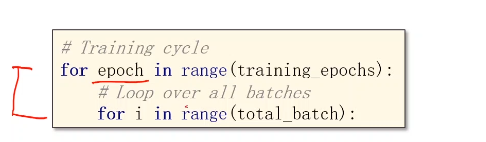
嵌套循环，内层循环跑batch内的迭代
- epoch：所有样本都跑了一次神经网络，叫一个epoch
- batch-szie：每次训练(前馈反馈更新)用的样本数量
- iteration：内层迭代分了多少次

10000样本，minibatch：1000  则iteration = 10

DaraLoader可以指定 batch_size(分组)和shuffle(打乱顺序)
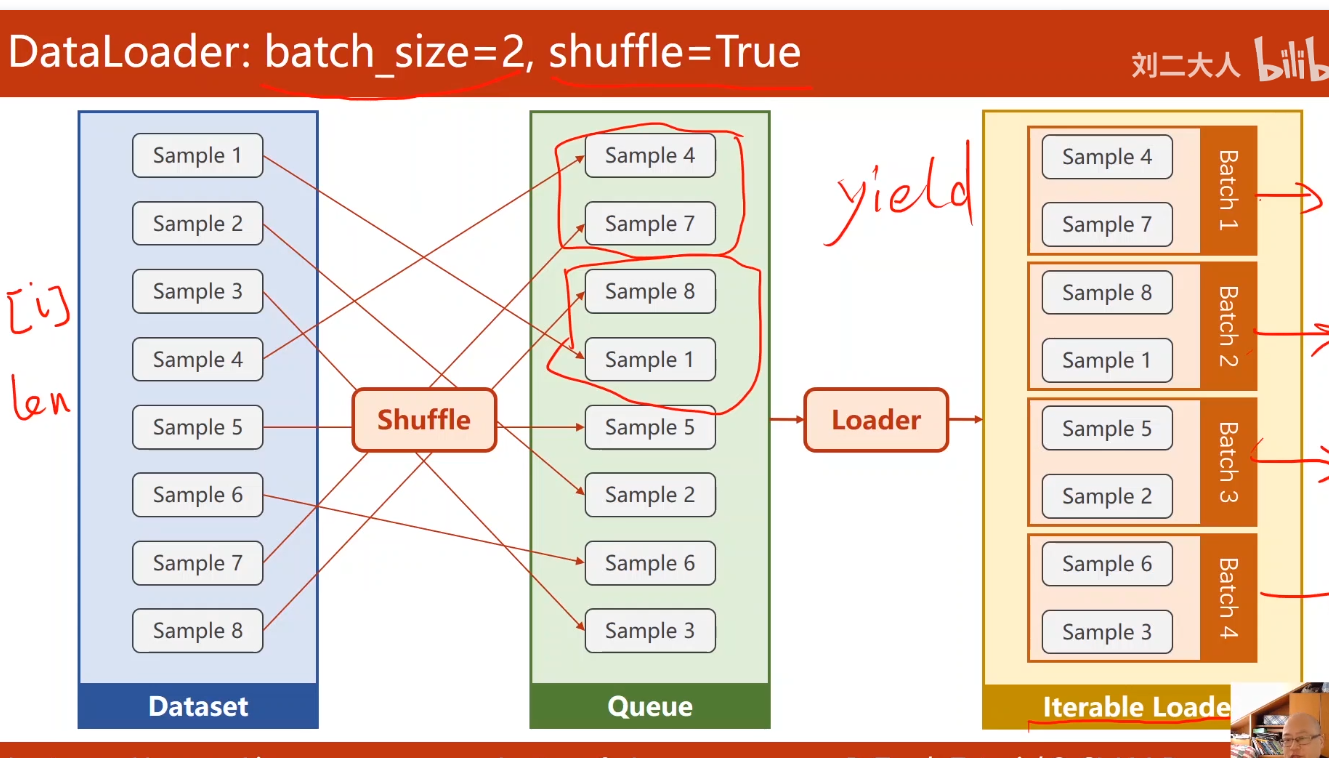

In [10]:
import torch
from torch.utils.data import Dataset  # 是一个抽象类，无法实例化
from torch.utils.data import DataLoader
import numpy as np

In [38]:
class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
        #pass
    # 魔法函数 支持下标操作
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
        #pass
    # 返回数据集个数
    def __len__(self):
        return self.len
        # pass

dataset = DiabetesDataset('diabetes.csv.gz')
train_loader = DataLoader(dataset=dataset, 
                          batch_size=32, #小批量容量
                          shuffle=True)
                          #shuffle=True,  #打乱
                          #num_workers=1) #读取数据到时候，是否并行

In [39]:
len(train_loader)

24

0.4的时候可能遇到的问题
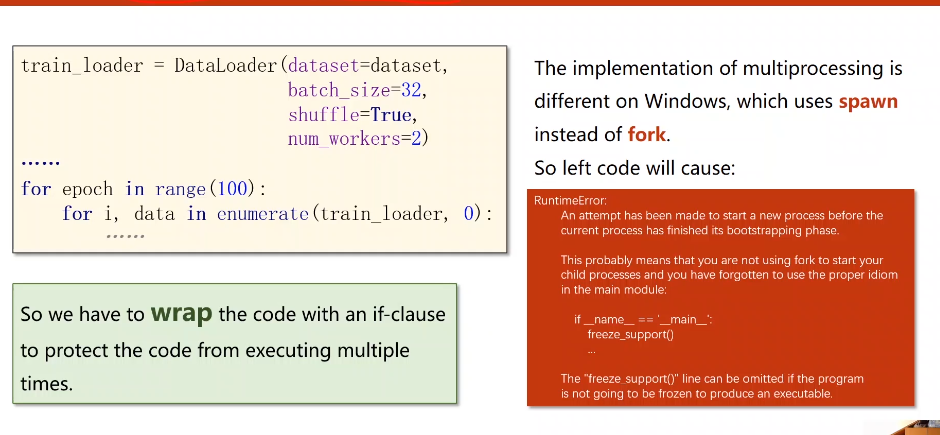

加一个__main__就行了
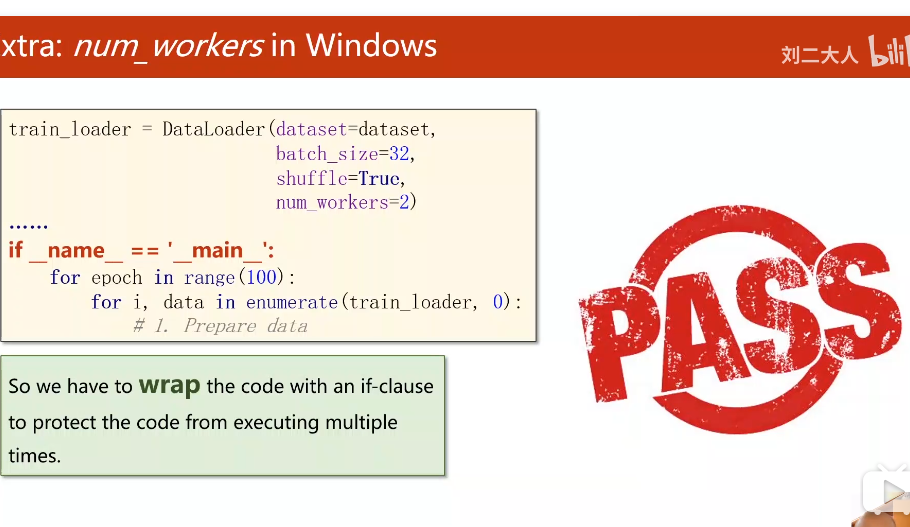

In [40]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()  # 这里改激活函数 比如 nn.ReLu
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()

In [20]:
cirterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [41]:

if __name__ == '__main__':
    for epoch in range(100):
        for i, data in enumerate(train_loader, start=0):
            # 1. 获取数据
            inputs, labels = data
            # 2. Forward
            y_pred = model(inputs)
            loss  = cirterion(y_pred, labels)
            print(epoch, i, loss.item())
            # 3. Backward
            optimizer.zero_grad()
            loss.backward()
            # 4. Update
            optimizer.step()

0 0 0.663460373878479
0 1 0.8131424784660339
0 2 0.8252328634262085
0 3 0.763181209564209
0 4 0.7879998087882996
0 5 0.7506601810455322
0 6 0.7625001668930054
0 7 0.8385250568389893
0 8 0.750869870185852
0 9 0.788719892501831
0 10 0.7753782272338867
0 11 0.7755752801895142
0 12 0.7762693762779236
0 13 0.7751666307449341
0 14 0.7256228923797607
0 15 0.7133623957633972
0 16 0.7752951383590698
0 17 0.7507469654083252
0 18 0.8384806513786316
0 19 0.7762927412986755
0 20 0.7758875489234924
0 21 0.8017312288284302
0 22 0.8017828464508057
0 23 0.7917783260345459
1 0 0.7882973551750183
1 1 0.7880068421363831
1 2 0.7885081768035889
1 3 0.7766646146774292
1 4 0.7510247826576233
1 5 0.7131742238998413
1 6 0.7634204626083374
1 7 0.7757333517074585
1 8 0.7633222341537476
1 9 0.8389393091201782
1 10 0.7386266589164734
1 11 0.8007190823554993
1 12 0.7379525899887085
1 13 0.7382202744483948
1 14 0.7631509304046631
1 15 0.762593686580658
1 16 0.788841962814331
1 17 0.7877998352050781
1 18 0.73810768127

16 21 0.775657057762146
16 22 0.7133708596229553
16 23 0.7564340829849243
17 0 0.7761796712875366
17 1 0.7383306622505188
17 2 0.725186824798584
17 3 0.7630965709686279
17 4 0.8131728768348694
17 5 0.7887144684791565
17 6 0.8125852942466736
17 7 0.7889876365661621
17 8 0.8009201288223267
17 9 0.7376881241798401
17 10 0.7378652691841125
17 11 0.8139837384223938
17 12 0.7761192321777344
17 13 0.80104660987854
17 14 0.7760552167892456
17 15 0.7630875110626221
17 16 0.7387131452560425
17 17 0.7884509563446045
17 18 0.7883079648017883
17 19 0.7635189294815063
17 20 0.7629556655883789
17 21 0.8261669278144836
17 22 0.750524640083313
17 23 0.755918562412262
18 0 0.7128543853759766
18 1 0.7264949083328247
18 2 0.7378306984901428
18 3 0.7630895972251892
18 4 0.8011676073074341
18 5 0.737227737903595
18 6 0.7887467741966248
18 7 0.7764837741851807
18 8 0.8258905410766602
18 9 0.7761041522026062
18 10 0.7884963750839233
18 11 0.7884865403175354
18 12 0.7753618955612183
18 13 0.7501266002655029
18

31 18 0.7881775498390198
31 19 0.7509203553199768
31 20 0.7388080358505249
31 21 0.7761222124099731
31 22 0.7884222865104675
31 23 0.8089989423751831
32 0 0.8135237097740173
32 1 0.7378034591674805
32 2 0.7884860038757324
32 3 0.7260491251945496
32 4 0.8253485560417175
32 5 0.7635966539382935
32 6 0.7508140802383423
32 7 0.7763798236846924
32 8 0.7887315154075623
32 9 0.8255718350410461
32 10 0.750248908996582
32 11 0.7629349827766418
32 12 0.8132878541946411
32 13 0.738473117351532
32 14 0.7888010144233704
32 15 0.725480318069458
32 16 0.7376251816749573
32 17 0.7878568172454834
32 18 0.7633585333824158
32 19 0.738737165927887
32 20 0.8008015155792236
32 21 0.8132610321044922
32 22 0.7510419487953186
32 23 0.8441898226737976
33 0 0.7622395753860474
33 1 0.7885777354240417
33 2 0.7884804606437683
33 3 0.7634851932525635
33 4 0.7887526750564575
33 5 0.7132062315940857
33 6 0.7883872985839844
33 7 0.7508664131164551
33 8 0.7133608460426331
33 9 0.7635443210601807
33 10 0.763209879398346


47 7 0.7760880589485168
47 8 0.8011494278907776
47 9 0.7755964994430542
47 10 0.7757807970046997
47 11 0.8132595419883728
47 12 0.7631584405899048
47 13 0.8133605122566223
47 14 0.7134623527526855
47 15 0.7760786414146423
47 16 0.7634415030479431
47 17 0.8134877681732178
47 18 0.7893553376197815
47 19 0.7759833931922913
47 20 0.7888031005859375
47 21 0.813779354095459
47 22 0.7377563714981079
47 23 0.7919718623161316
48 0 0.7755921483039856
48 1 0.7134602665901184
48 2 0.7386460900306702
48 3 0.7762963175773621
48 4 0.7501019835472107
48 5 0.7890843152999878
48 6 0.7878058552742004
48 7 0.7884105443954468
48 8 0.788857638835907
48 9 0.8261300921440125
48 10 0.7385315299034119
48 11 0.7879114747047424
48 12 0.762811541557312
48 13 0.7375924587249756
48 14 0.7382422685623169
48 15 0.8008664846420288
48 16 0.763283371925354
48 17 0.7880923748016357
48 18 0.8008201718330383
48 19 0.8005889654159546
48 20 0.8007586002349854
48 21 0.8263487219810486
48 22 0.7382829189300537
48 23 0.774202764

62 14 0.8386899828910828
62 15 0.8013932704925537
62 16 0.7381277680397034
62 17 0.8011988401412964
62 18 0.7499034404754639
62 19 0.7505301237106323
62 20 0.7638105154037476
62 21 0.7881503105163574
62 22 0.8011829853057861
62 23 0.7216722369194031
63 0 0.7751776576042175
63 1 0.8262495994567871
63 2 0.7505481243133545
63 3 0.7631292939186096
63 4 0.8133969902992249
63 5 0.8386037945747375
63 6 0.8010957837104797
63 7 0.7004555463790894
63 8 0.7881094813346863
63 9 0.7757478952407837
63 10 0.7258212566375732
63 11 0.776080310344696
63 12 0.81370609998703
63 13 0.7627841830253601
63 14 0.7514727711677551
63 15 0.7377864718437195
63 16 0.7508358955383301
63 17 0.7882328033447266
63 18 0.763971209526062
63 19 0.8013237714767456
63 20 0.6876542568206787
63 21 0.7757627964019775
63 22 0.8129848837852478
63 23 0.8264952301979065
64 0 0.8131182193756104
64 1 0.7761197090148926
64 2 0.7130000591278076
64 3 0.8133628368377686
64 4 0.6879772543907166
64 5 0.7761962413787842
64 6 0.8127315044403

77 2 0.7634419798851013
77 3 0.8392617702484131
77 4 0.7508122324943542
77 5 0.7631224989891052
77 6 0.8011273741722107
77 7 0.7759557962417603
77 8 0.7758031487464905
77 9 0.712956964969635
77 10 0.7634939551353455
77 11 0.8259212970733643
77 12 0.7626565098762512
77 13 0.7634649276733398
77 14 0.7509512305259705
77 15 0.7507745623588562
77 16 0.8125150799751282
77 17 0.7005001306533813
77 18 0.8130449056625366
77 19 0.8137780427932739
77 20 0.7502932548522949
77 21 0.8017755150794983
77 22 0.7624813914299011
77 23 0.7564772963523865
78 0 0.7884008884429932
78 1 0.7253769636154175
78 2 0.7635984420776367
78 3 0.7760599255561829
78 4 0.8134098649024963
78 5 0.8009711503982544
78 6 0.8015650510787964
78 7 0.8014258146286011
78 8 0.7889222502708435
78 9 0.8009340763092041
78 10 0.8131810426712036
78 11 0.7129641771316528
78 12 0.7253856062889099
78 13 0.7503934502601624
78 14 0.8262900710105896
78 15 0.7374916672706604
78 16 0.7382111549377441
78 17 0.8006860017776489
78 18 0.80083352327

92 12 0.7759721279144287
92 13 0.7252461910247803
92 14 0.8013597130775452
92 15 0.7508799433708191
92 16 0.8133977651596069
92 17 0.7755443453788757
92 18 0.7505356073379517
92 19 0.7505860924720764
92 20 0.8387892246246338
92 21 0.726274847984314
92 22 0.7751793265342712
92 23 0.8108176589012146
93 0 0.8260197639465332
93 1 0.7635734677314758
93 2 0.7884424328804016
93 3 0.6879642009735107
93 4 0.8136280179023743
93 5 0.7376599907875061
93 6 0.7761057615280151
93 7 0.8007051348686218
93 8 0.7257331013679504
93 9 0.7877504825592041
93 10 0.7753498554229736
93 11 0.738197922706604
93 12 0.7506997585296631
93 13 0.7764474153518677
93 14 0.7881166934967041
93 15 0.8258408308029175
93 16 0.7765541076660156
93 17 0.7760534882545471
93 18 0.7381599545478821
93 19 0.8005372285842896
93 20 0.8261810541152954
93 21 0.7504711151123047
93 22 0.7629374265670776
93 23 0.8095240592956543
94 0 0.7891818881034851
94 1 0.7635918855667114
94 2 0.7381477952003479
94 3 0.7618367671966553
94 4 0.725629210

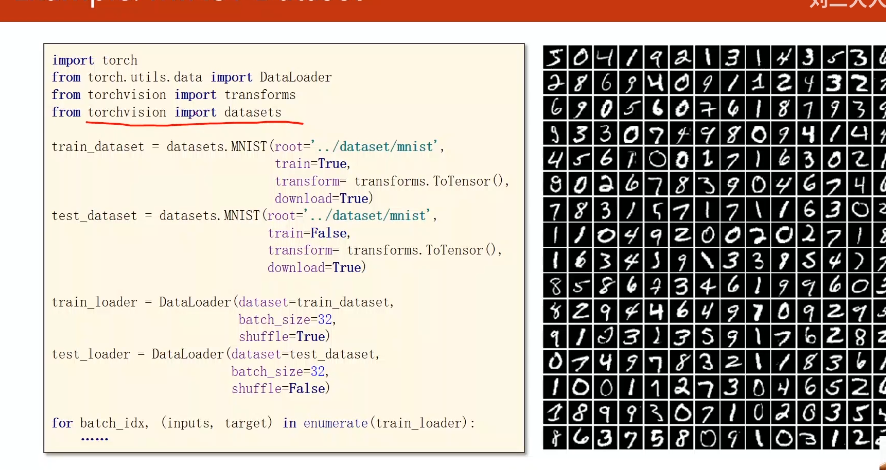
需要转换成张亮

In [42]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [103]:
class TitanicDataset(Dataset):
    def __init__(self):
        self.x_data = torch.from_numpy(np.array(pd.read_csv("./test.csv")[['Pclass','Age','SibSp','Fare']]))
        self.y_data = torch.from_numpy(np.array(pd.read_csv("./gender_submission.csv"))[:,[1]])
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        return self.x_data.shape[0]
    

In [104]:
titanic = TitanicDataset()

In [105]:
titanicLoader = DataLoader(dataset = titanic,
                          batch_size=32,
                          shuffle=True)

In [96]:
for each in titanicLoader:
    print(each)

[tensor([[1.0000e+00, 5.3000e+01, 0.0000e+00, 2.7446e+01],
        [3.0000e+00,        nan, 0.0000e+00, 7.7500e+00],
        [1.0000e+00, 5.8000e+01, 0.0000e+00, 5.1233e+02],
        [2.0000e+00, 4.8000e+01, 0.0000e+00, 3.6750e+01],
        [3.0000e+00, 3.3000e-01, 0.0000e+00, 1.4400e+01],
        [3.0000e+00, 2.1000e+01, 0.0000e+00, 7.8542e+00],
        [3.0000e+00,        nan, 1.0000e+00, 1.4454e+01],
        [1.0000e+00, 6.0000e+00, 0.0000e+00, 1.3450e+02],
        [3.0000e+00, 2.6500e+01, 0.0000e+00, 7.2250e+00],
        [3.0000e+00, 2.2000e+01, 0.0000e+00, 7.7958e+00],
        [1.0000e+00, 5.9000e+01, 2.0000e+00, 5.1479e+01],
        [1.0000e+00, 3.0000e+01, 1.0000e+00, 1.5155e+02],
        [1.0000e+00, 2.4000e+01, 1.0000e+00, 8.2267e+01],
        [2.0000e+00, 2.0000e+01, 0.0000e+00, 3.6750e+01],
        [2.0000e+00, 1.8000e+01, 0.0000e+00, 1.0500e+01],
        [1.0000e+00, 3.1000e+01, 0.0000e+00, 2.8538e+01],
        [3.0000e+00, 3.9000e+01, 0.0000e+00, 7.2292e+00],
        [1.00

In [57]:
csv_data[['Pclass','Sex','Age','SibSp','Fare']].isnull()

,Pclass,Sex,Age,SibSp,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
413,False,False,True,False,False
414,False,False,False,False,False
415,False,False,False,False,False
416,False,False,True,False,False


In [54]:
MAP_Sex = {'male':0,'female':1}

In [55]:
csv_data['Sex'] = csv_data['Sex'].map(MAP_Sex)

In [58]:
csv_data[['Pclass','Sex','Age','SibSp','Fare']]

,Pclass,Sex,Age,SibSp,Fare
0,3,0,34.5,0,7.8292
1,3,1,47.0,1,7.0000
2,2,0,62.0,0,9.6875
3,3,0,27.0,0,8.6625
4,3,1,22.0,1,12.2875
...,...,...,...,...,...
413,3,0,NaN,0,8.0500
414,1,1,39.0,0,108.9000
415,3,0,38.5,0,7.2500
416,3,0,NaN,0,8.0500


In [60]:
csv_data.fillna({'Pclass':1,'Sex':0,'Age':0}).isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,False,False,False,False,True,False


In [62]:
csv_data['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool

In [63]:
import numpy as np

In [64]:
np.array(csv_data)

array([[892, 3, 'Kelly, Mr. James', ..., 7.8292, nan, 'Q'],
       [893, 3, 'Wilkes, Mrs. James (Ellen Needs)', ..., 7.0, nan, 'S'],
       [894, 2, 'Myles, Mr. Thomas Francis', ..., 9.6875, nan, 'Q'],
       ...,
       [1307, 3, 'Saether, Mr. Simon Sivertsen', ..., 7.25, nan, 'S'],
       [1308, 3, 'Ware, Mr. Frederick', ..., 8.05, nan, 'S'],
       [1309, 3, 'Peter, Master. Michael J', ..., 22.3583, nan, 'C']],
      dtype=object)